In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from matplotlib.colors import LightSource
from scipy import ndimage
import astropy.io.fits as fits
import glob
from astropy.wcs import WCS
from matplotlib.colors import LogNorm

# Load in Data

In [2]:
g_image_file = "medusa_images/medusa_g.fits"
halpha_image_file = "medusa_images/medusa_halpha.fits"
i_image_file = "medusa_images/medusa_i.fits"
o3_1_image_file = "medusa_images/medusa_o3_1.fits"
o3_2_image_file = "medusa_images/medusa_o3_2.fits"
r_image_file = "medusa_images/medusa_r.fits"
u_image_file = "medusa_images/medusa_u.fits"
z_image_file = "medusa_images/medusa_z.fits"

In [3]:
g_data = fits.getdata(g_image_file)
halpha_data = fits.getdata(halpha_image_file)
i_data = fits.getdata(i_image_file)
o3_1_data = fits.getdata(o3_1_image_file)
o3_2_data = fits.getdata(o3_2_image_file)
r_data = fits.getdata(r_image_file)
u_data = fits.getdata(u_image_file)
z_data = fits.getdata(z_image_file)

# Create empty array then fill with image data

In [180]:
colorarray = np.zeros((1024,1024,3), dtype='uint8')

print(colorarray.shape, colorarray.dtype)

((1024L, 1024L, 3L), dtype('uint8'))


In [181]:
colorarray[:,:,0] = halpha_data * 10000
colorarray[:,:,1] = g_data 
colorarray[:,:,2] = o3_1_data *.4

#print(colorarray)

# Plot single filters and all filters stacked

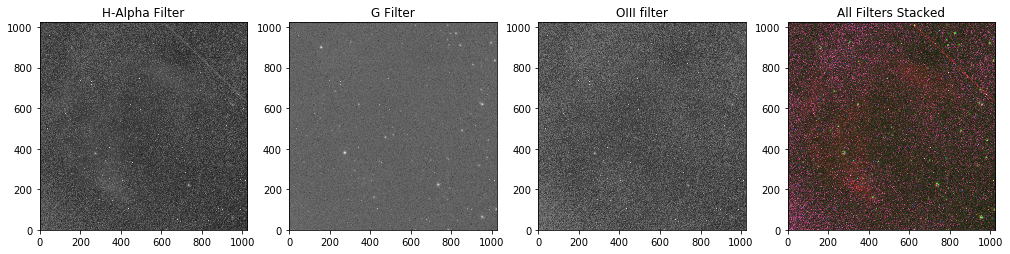

In [182]:
fig, ax = plt.subplots(1,4)
fig.set_size_inches(14,5)

fig.tight_layout()

ax[0].set_title("H-Alpha Filter")
ax[1].set_title("G Filter")
ax[2].set_title("OIII filter")
ax[3].set_title("All Filters Stacked")

ax[0].imshow(halpha_data, origin='lower', cmap=plt.cm.gray, norm=LogNorm())  
ax[1].imshow(g_data,origin='lower', cmap=plt.cm.gray, norm=LogNorm())
ax[2].imshow(o3_1_data,origin='lower', cmap=plt.cm.gray, norm=LogNorm())
ax[3].imshow(colorarray,origin='lower', cmap=plt.cm.gray, norm=LogNorm());

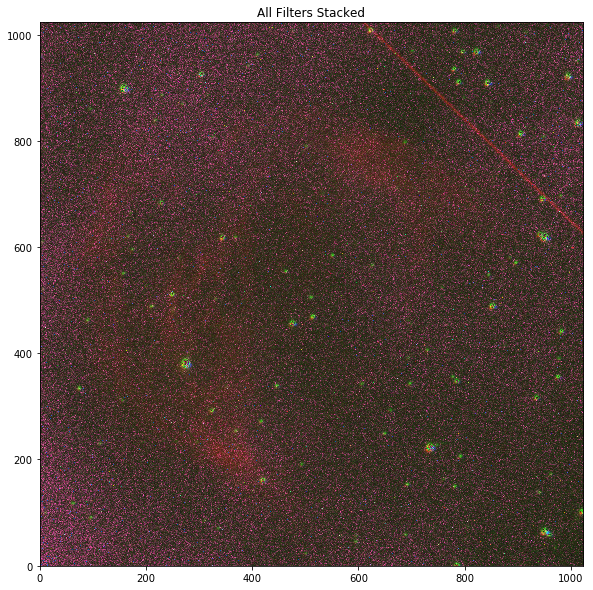

In [183]:
plt.figure(figsize=(10,10))
plt.title('All Filters Stacked')
plt.imshow(colorarray,origin='lower', cmap=plt.cm.gray, norm=LogNorm());

# Plot the filters not used in composite images

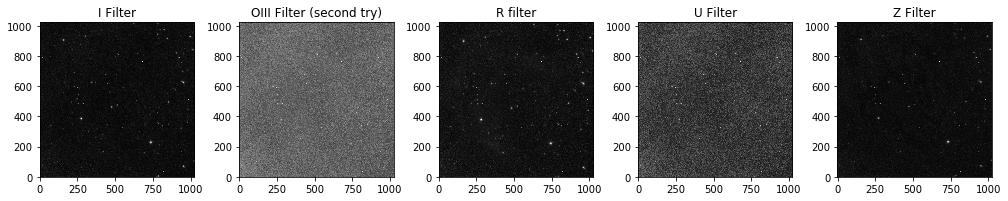

In [184]:
fig, ax = plt.subplots(1,5)
fig.set_size_inches(14,3)

fig.tight_layout()

ax[0].set_title("I Filter")
ax[1].set_title("OIII Filter (second try)")
ax[2].set_title("R filter")
ax[3].set_title("U Filter")
ax[4].set_title("Z Filter")

ax[0].imshow(i_data, origin='lower', cmap=plt.cm.gray, norm=LogNorm())  
ax[1].imshow(o3_2_data,origin='lower', cmap=plt.cm.gray, norm=LogNorm())
ax[2].imshow(r_data,origin='lower', cmap=plt.cm.gray, norm=LogNorm())
ax[3].imshow(u_data,origin='lower', cmap=plt.cm.gray, norm=LogNorm())
ax[4].imshow(z_data,origin='lower', cmap=plt.cm.gray, norm=LogNorm());